In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('housing.csv')
print("name")

name


In [3]:
data=pd.read_csv("Housing.csv")
categorical_cols = [
    "mainroad", "guestroom", "basement", "hotwaterheating",
    "airconditioning", "prefarea", "furnishingstatus"
]

numerical_cols = [
    "area", "bedrooms", "bathrooms", "stories", "parking"
]

# 'price' will go at the end
new_order = categorical_cols + numerical_cols + ["price"]

# Reorder the DataFrame
df = data[new_order]


In [5]:
data=df
data.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking,price
0,yes,no,no,no,yes,yes,furnished,7420,4,2,3,2,13300000
1,yes,no,no,no,yes,no,furnished,8960,4,4,4,3,12250000
2,yes,no,yes,no,no,yes,semi-furnished,9960,3,2,2,2,12250000
3,yes,no,yes,no,yes,yes,furnished,7500,4,2,2,3,12215000
4,yes,yes,yes,no,yes,no,furnished,7420,4,1,2,2,11410000


In [6]:
data.head()
del data['basement']
del data["hotwaterheating"]

In [7]:
data.head()

,mainroad,guestroom,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking,price
0,yes,no,yes,yes,furnished,7420,4,2,3,2,13300000
1,yes,no,yes,no,furnished,8960,4,4,4,3,12250000
2,yes,no,no,yes,semi-furnished,9960,3,2,2,2,12250000
3,yes,no,yes,yes,furnished,7500,4,2,2,3,12215000
4,yes,yes,yes,no,furnished,7420,4,1,2,2,11410000


In [7]:
data=df
mainroad_std=OrdinalEncoder()
guestroom_std=OrdinalEncoder()
airconditioning_std=OrdinalEncoder()
prefarea=OrdinalEncoder()
furninsh_std=OrdinalEncoder()

In [8]:
import joblib
data['mainroad']=mainroad_std.fit_transform(data[['mainroad']])
joblib.dump(mainroad_std,"mainroad_std.pkl")
guestroom_std = OrdinalEncoder()
data['guestroom'] = guestroom_std.fit_transform(data[['guestroom']])
joblib.dump(guestroom_std, "guestroom_std.pkl")
airconditioning_std = OrdinalEncoder()
data['airconditioning'] = airconditioning_std.fit_transform(data[['airconditioning']])
joblib.dump(airconditioning_std, "airconditioning_std.pkl")
prefarea_std = OrdinalEncoder()
data['prefarea'] = prefarea_std.fit_transform(data[['prefarea']])
joblib.dump(prefarea_std, "prefarea_std.pkl")
furninsh_std = OrdinalEncoder()
data['furnishingstatus'] = furninsh_std.fit_transform(data[['furnishingstatus']])
joblib.dump(furninsh_std, "furninsh_std.pkl")

['furninsh_std.pkl']

In [9]:
mainroad_std.categories_

[array(['no', 'yes'], dtype=object)]

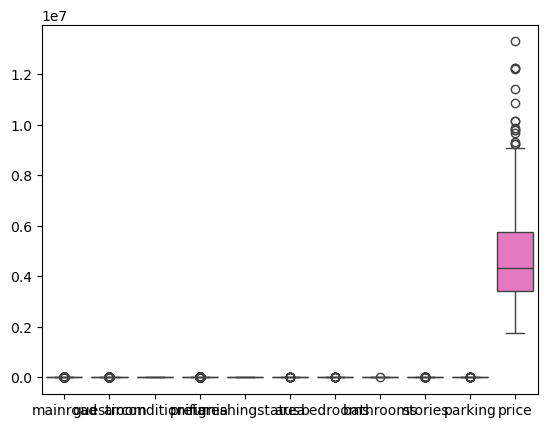

In [10]:
sns.boxplot(data)
plt.show()

In [27]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
u= Q3 + 1.5 * IQR
l = Q1 - 1.5 * IQR
# # Count how many rows are outliers based on the IQR rule
# outliers = ((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))
# total_outliers = outliers.sum()

# print("Total outliers in price column:", total_outliers)
data=data[~(data['price']>=l)&(data['price']<=u).any(axis=1)]


ValueError: No axis named 1 for object type Series

In [28]:
data

,mainroad,guestroom,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking,price
0,yes,no,yes,yes,furnished,7420,4,2,3,2,13300000
1,yes,no,yes,no,furnished,8960,4,4,4,3,12250000
2,yes,no,no,yes,semi-furnished,9960,3,2,2,2,12250000
3,yes,no,yes,yes,furnished,7500,4,2,2,3,12215000
4,yes,yes,yes,no,furnished,7420,4,1,2,2,11410000
...,...,...,...,...,...,...,...,...,...,...,...
540,yes,no,no,no,unfurnished,3000,2,1,1,2,1820000
541,no,no,no,no,semi-furnished,2400,3,1,1,0,1767150
542,yes,no,no,no,unfurnished,3620,2,1,1,0,1750000
543,no,no,no,no,furnished,2910,3,1,1,0,1750000


In [59]:
data.to_csv("process_house.csv",index=False)